# Gradient Descent Intro

In [1]:
# Import modules

import numpy
import csv
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Read in the data for problem 3

p3_data = []

with open('problem3.csv', newline='') as p3_data_file:
     csv_reader = csv.reader(p3_data_file)
     for row in csv_reader:
        p3_data.append(float(row[0]))

p3_data = numpy.asarray(p3_data)
#print(p3_data)

In [88]:
# Negative log likelihood function.
# The theta is a numpy array with two components: mu and ln(sigma^2).
# The last is the numpy data set (1-D)

# Keep track of the function values.
fval_history = []

# Keep track of the iterate history.
theta_history = []

def loglikelihood(theta, data):
  num_points = data.shape[0]
  x_0, gamma = theta
  loglikelihood = num_points * gamma - num_points * numpy.log(numpy.pi)
  loglikelihood = loglikelihood - sum(numpy.log(numpy.exp(2 * gamma) + (data - x_0) ** 2))
  global fval_history
  fval_history += [ loglikelihood ]
  global theta_history
  theta_history += [ theta ]
  return - loglikelihood

(576,)
(24,)
(24, 24) (24, 24) (24, 24)
-60 30


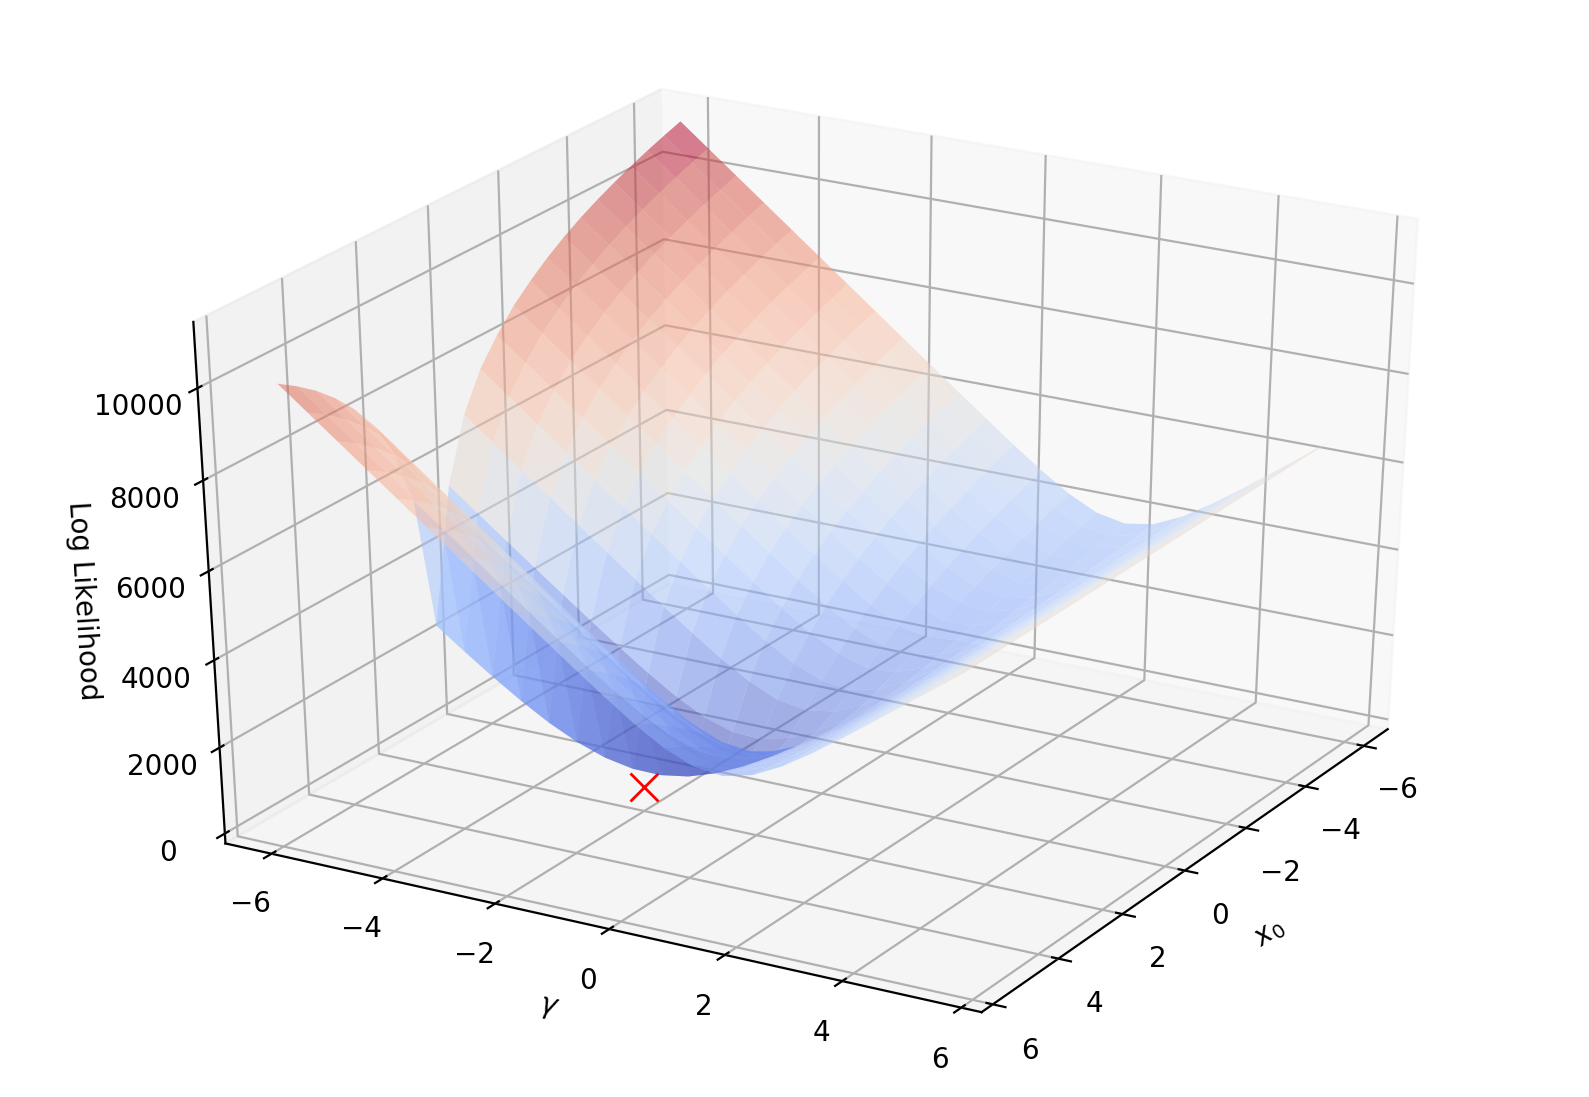

In [4]:
# Plot
fig = plt.figure(figsize=(10, 7), dpi = 200)
ax = fig.add_subplot(111, projection='3d')
x = numpy.arange(-6, 6, 0.5)
y = numpy.arange(-6, 6, 0.5)
X, Y = numpy.meshgrid(x, y)
print(numpy.ravel(X).shape)
print(x.shape)

def fun(x, y, data):
  return numpy.array([
    loglikelihood((x_value, y_value), data) for x_value, y_value in zip(x,y)])

zs = numpy.array(fun(numpy.ravel(X), numpy.ravel(Y), p3_data))
Z = zs.reshape(X.shape)
print(Z.shape, Y.shape, X.shape)

ax.plot_surface(X, Y, Z, cmap = cm.coolwarm, alpha = 0.5)

ax.set_xlabel('$x_0$')
ax.set_ylabel('$\gamma$')
ax.set_zlabel('Log Likelihood')

# Get current rotation angle
print (ax.azim, ax.elev)
 
# Set rotation angle to 30 degrees
ax.view_init(azim = 30)
plt.plot([1.5], [-2.3], 'rx', markersize = 10)
plt.show()

In [96]:
def gradient(theta, data):
  num_points = data.shape[0]  
  x_0, gamma = theta
  grad = numpy.zeros((2,))
  # The partial with respect to x_0.
  grad[0] = sum( 2 * (data - x_0) / (numpy.exp(2 * gamma) + (data - x_0) ** 2 ))
  # The partial with respect to gamma.
  grad[1] = num_points - sum( 2 * numpy.exp(2 * gamma) / (numpy.exp(2 * gamma) + (data - x_0) ** 2 ))
  return - grad

def callback_function(iterate):
    print(iterate)

theta_0 = numpy.array([10.0, 5.0])

minimize(loglikelihood, theta_0, args = (p3_data,), 
         method = 'BFGS', jac = gradient)

#print(theta_history)

numpy.savetxt("p3_history.csv", theta_history, delimiter=' & ', fmt='%6.4f', newline=' \\\\\n')

In [107]:
import pandas as pd 

index = list(range(752))
#print(index)

df_c = pd.concat([pd.DataFrame(index), pd.DataFrame(theta_history)], axis=1)
print(df_c)

numpy.savetxt("p3_history.csv", df_c, delimiter=' & ', fmt='%6.4f', newline=' \\\\\n')

       0          0         1
0      0  10.000000  5.000000
1      1   9.999217  3.990000
2      2   9.996085 -0.049998
3      3   9.997842  2.215750
4      4 -27.611102 -2.195750
..   ...        ...       ...
747  747   1.493487 -2.210556
748  748   1.493487 -2.210556
749  749   1.493487 -2.210556
750  750   1.493487 -2.210556
751  751   1.493487 -2.210556

[752 rows x 3 columns]


# Gradient descent for ridge regression

In [ ]:
# Load Boston dataset.
import math
import numpy
import sklearn.datasets
import sklearn.linear_model
import sklearn.preprocessing

X, y = sklearn.datasets.load_boston(return_X_y=True)
print(X[0], y[0])
X_scaler = sklearn.preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
X = X_scaler.fit_transform(X)
y_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), copy=True)
y = y_scaler.fit_transform(y.reshape(-1, 1))
y = y.reshape((X.shape[0],))
print(X.shape)

In [ ]:
import numpy
import matplotlib.pyplot as plt
from numpy import linalg
import sklearn.linear_model

# alpha is the $\lambda$ regularizer.
# learning_rate is $\eta$.
# num_epochs is $T$
def gradient_descent(
    starting_iterate, X, y, alpha=1, learning_rate=0.01,   
    num_epochs=1000):
  
  # Objective function given the iterate.
  def objective(iterate):
    obj = 0.0
    for i, (x_value, y_value) in enumerate(zip(X, y)):
      diff = (y_value - (iterate[0] + numpy.dot(iterate[1:], x_value)))
      obj = (obj * i + diff * diff) / (i + 1.0)
    iterate_norm = numpy.linalg.norm(iterate[1:])
    return obj + alpha * iterate_norm * iterate_norm

  # Weight vector: 0-th component is the bias, the rest are the coefficients.
  weight_vector = starting_iterate

  # Keeps track of the regularized objective values and the L_2 norm history
  # of the weight vector.
  obj_values = numpy.zeros(num_epochs)
  two_norm_history = numpy.zeros(num_epochs)

  # For each epoch,
  if alpha == 0.1:
    print('\begin{tabular}{|c|c|c|c|}')
    print('IterationNum & RegObjValue & b & w\\\\')
    print('\hline \\\\')
  for i in range(num_epochs): 
    obj_values[i] = objective(weight_vector)

    if alpha == 0.1:
      print(str(i) + ' & ' + str(obj_values[i]) + ' & ' + \
            str(weight_vector[0]) + ' & ' + str(weight_vector[1:]) + '\\\\')
    
    two_norm_history[i] = numpy.linalg.norm(weight_vector[1:])

    prev_weight_vector = weight_vector
    weight_gradient = numpy.zeros( len(weight_vector) - 1)
    bias_gradient = 0

    # Loop over each data point.
    for j, x_vec in enumerate(X):

      # Prediction on the current linear model.
      pred = weight_vector[0] + numpy.dot(x_vec, weight_vector[1:])

      # Gradient contribution for $(b, w)$ from the current point.
      bias_gradient += 2 * (y[j] - pred)
      weight_gradient += 2 * (y[j] - pred) * x_vec
    
    # Normalize and for the weight, add in the regularization part.
    bias_gradient *= (-1 / float(X.shape[0]))
    weight_gradient *= (-1 / float(X.shape[0]))
    weight_gradient += 2 * alpha * weight_vector[1:]

    # Perform the gradient step for the current epoch.
    weight_vector[0] = weight_vector[0] - learning_rate * bias_gradient
    weight_vector[1:] = weight_vector[1:] - learning_rate * weight_gradient

  return weight_vector, obj_values, two_norm_history

# Number of epochs
num_epochs = 100


# Verify rank.
print('Rank', numpy.linalg.matrix_rank(X), ' versus ', X.shape[1])

# The least squares solution.
linear_model = sklearn.linear_model.LinearRegression(
    fit_intercept=True, normalize=False, copy_X=True)
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)

# Figure adjust
size=20
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

# Batch result.
print('Batch result')
alpha_set = [10, 1, 0.1, 0.01, 0.001]
iterate_history = numpy.zeros((X.shape[1], len(alpha_set)))
for i, alpha in enumerate(alpha_set):
  iterate = numpy.zeros(X.shape[1] + 1)
  iterate, obj_values, two_norm_history = gradient_descent(
      iterate, X, y, alpha=alpha, num_epochs=num_epochs)
  iterate_history[:, i] = iterate[1:]
  if alpha == 0.1:
    plt.figure()
    plt.plot(range(num_epochs), obj_values, '*', label='reg objective value')
    plt.plot(range(num_epochs), two_norm_history, '+', label='2-norm of the weight')
    plt.legend()
    plt.xlabel('Epoch Number')
    plt.show()
    
plt.xscale('log')
plt.xlabel(r'$\lambda$')
plt.ylabel('coefficient')

for i in range(X.shape[1]):
  feature_name = 'Feature ' + str(i)
  plt.plot(alpha_set, iterate_history[i, :], label=feature_name)
plt.legend()
plt.show()